In [1]:
%matplotlib inline
%run -i ../../code/utils.py
%run -i ../../code/Wallas_Solvers.py
%run -i ../../code/WallasUtils.py
%run -i ../../code/results_toolkit.py

In [2]:
%run -i ../../code/SimulacionPaper.py

In [3]:
dia1 = "010"
dian = "010"
ano = "2017"

Observable = "C1"
# Variables de la grafica
error_max = 100

# Ubicacion de la Rinex local DB 
Rinex_dataBase      = "../../new_data"
Simu_Folder         = getcwd() +"/" + "Temp_Simul_data"

# agregando nuevos pares de estaciones (que no estan en el kmz)
parejas_kmz        = get_data_stations("../../Coconet_sites_2016.kmz", 300)

#RinexDB = descarga_Rinex_Compri(Rinex_dataBase, parejas_kmz, dia1, dian, ano)
## Leer los rinex almacenado en mi equipo
RinexDB = read_Rinex_Compri(Rinex_dataBase, parejas_kmz)

100000000.0 224.572580106 entre JME2 y JMEL
100000000.0 142.344182101 entre TGMX y UNPM
100000000.0 201.990961614 entre CN20 y TGPM


# Suministrando distancia real (d_error =0)

In [5]:
obsfile1 = "../../NavFiles/cn200100.17o" 
navfile1 = "../../NavFiles/cn200100.17n" 

obsfile2 = "../../NavFiles/tgpm0100.17o"
navfile2 = "../../NavFiles/tgpm0100.17n"

# data, bcestore, rec_pos = rinex_to_dataframe(obsfile, navfile)
data1, bcestore1, rec_pos1 = rinex_to_dataframe_iono(obsfile1, navfile1)
# data, bcestore, rec_pos = rinex_to_dataframe(obsfile, navfile)
data2, bcestore2, rec_pos2 = rinex_to_dataframe_iono(obsfile2, navfile2)

dr,_,dr_vec = d_teta_calc(rec_pos1, rec_pos2)

WARNING! observation `C2` no present in file ../../NavFiles/cn200100.17o
WARNING! observation `C2` no present in file ../../NavFiles/tgpm0100.17o


In [6]:
res = run_simulation_paper(Observable, error_max, parejas_kmz, RinexDB, dia1, dian, ano, dist=dr,
                           res_plot=1200, apply_iono_model="klobu")

{0: ('JME2', 'JMEL'), 1: ('TGMX', 'UNPM'), 2: ('CN20', 'TGPM')}
	 [Station Pair] 	 [GPS day] 	 [year] 		 [Process status]

WARNING! ✘  Aborting execution: missing rinex files for ('JME2', 'JMEL') 

	 ('TGMX', 'UNPM') 		 10 		 2017 		 ✔  Running...
WARNING! observation `C2` no present in file /media/DATOS/0_bitbucket/repo/Avances/Temp_Simul_data/tgmx0100.17o
WARNING! observation `C2` no present in file /media/DATOS/0_bitbucket/repo/Avances/Temp_Simul_data/unpm0100.17o
		 Rinex Observation:  0 1200 2400

/home/wallas/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:323: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
/home/wallas/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:326: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


 3600 4800 	 ('CN20', 'TGPM') 		 10 		 2017 		 ✔  Running...
WARNING! observation `C2` no present in file /media/DATOS/0_bitbucket/repo/Avances/Temp_Simul_data/cn200100.17o
WARNING! observation `C2` no present in file /media/DATOS/0_bitbucket/repo/Avances/Temp_Simul_data/tgpm0100.17o
		 Rinex Observation:  0 1200 2400 3600 4800 

	Simulation Finished!
	 ******************************


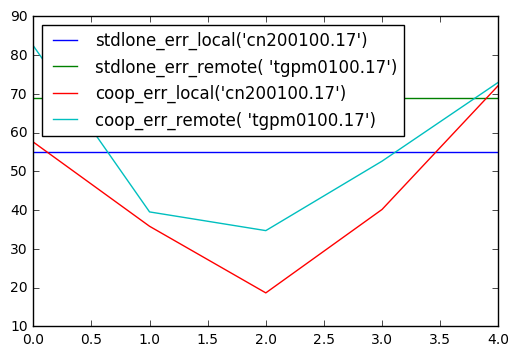

In [7]:
parejas = res.keys()
par_id = 0

df = res[parejas[par_id]][10][:][["stdlone_err_local", "stdlone_err_remote", "coop_err_local", "coop_err_remote"]]
par = [p.strip("()") for p in parejas]

df2 = pd.DataFrame()
df2["stdlone_err_local("+par[par_id].split(",")[0]+")"] = df[["stdlone_err_local"]]
df2["stdlone_err_remote("+par[par_id].split(",")[1]+")"]= df[["stdlone_err_remote"]]
df2["coop_err_local("+par[par_id].split(",")[0]+")"]    = df[["coop_err_local"]]
df2["coop_err_remote("+par[par_id].split(",")[1]+")"]   = df[["coop_err_remote"]]
df2 = df2[df2<=100]
df2.plot()

## Analizando pareja de estaciones CN20 - TGMP (d_error != 0)

In [ ]:
res = run_simulation_paper(Observable, error_max, parejas_kmz, RinexDB, dia1, dian, ano,
                           res_plot=300, apply_iono_model="klobu")

In [ ]:
parejas = res.keys()
par_id = 0

df = res[parejas[par_id]][10][:][["stdlone_err_local", "stdlone_err_remote", "coop_err_local", "coop_err_remote"]]
par = [p.strip("()") for p in parejas]

df2 = pd.DataFrame()
df2["stdlone_err_local("+par[par_id].split(",")[0]+")"] = df[["stdlone_err_local"]]
df2["stdlone_err_remote("+par[par_id].split(",")[1]+")"]= df[["stdlone_err_remote"]]
df2["coop_err_local("+par[par_id].split(",")[0]+")"]    = df[["coop_err_local"]]
df2["coop_err_remote("+par[par_id].split(",")[1]+")"]   = df[["coop_err_remote"]]
df2 = df2[df2<=100]
df2.plot()

In [ ]:
df = res[parejas[par_id]][10][:][["dreal", "d_calc"]]
df.plot()

dr = df.dreal
dc = df.d_calc
print "distancia   real %s [m] \ndistancia 'coop' %s [m]"% (dr, dc)
print "diferencia %s[m] (%s %%)"%(np.linalg.norm(dr - dc), np.linalg.norm(dr - dc)/dr*100)

pareciera que la linea de vista para este par de estaciones es menos obstaculizada, y por ello el modelo entrega mejores resultados (**recordando que aun no se ha tomado en cuenta multipath**)

In [ ]:
from IPython.display import Image
Image(filename='./images/cn20-tgpm.png') 

# Suministrando distancia real (d_error =0)

In [ ]:
obsfile1 = "../../NavFiles/tgmx0100.17o" 
navfile1 = "../../NavFiles/tgmx0100.17n" # tgpm0100.17n 

obsfile2 = "../../NavFiles/unpm0100.17o"
navfile2 = "../../NavFiles/unpm0100.17n"

# data, bcestore, rec_pos = rinex_to_dataframe(obsfile, navfile)
data1, bcestore1, rec_pos1 = rinex_to_dataframe_iono(obsfile1, navfile1)
# data, bcestore, rec_pos = rinex_to_dataframe(obsfile, navfile)
data2, bcestore2, rec_pos2 = rinex_to_dataframe_iono(obsfile2, navfile2)

dr,_,dr_vec = d_teta_calc(rec_pos1, rec_pos2)

res = run_simulation_paper(Observable, error_max, parejas_kmz, RinexDB, dia1, dian, ano, dist=dr,
                           res_plot=300, apply_iono_model="klobu")

In [ ]:
parejas = res.keys()
par_id = 1

df = res[parejas[par_id]][10][:][["stdlone_err_local", "stdlone_err_remote", "coop_err_local", "coop_err_remote"]]
par = [p.strip("()") for p in parejas]

df2 = pd.DataFrame()
df2["stdlone_err_local("+par[par_id].split(",")[0]+")"] = df[["stdlone_err_local"]]
df2["stdlone_err_remote("+par[par_id].split(",")[1]+")"]= df[["stdlone_err_remote"]]
df2["coop_err_local("+par[par_id].split(",")[0]+")"]    = df[["coop_err_local"]]
df2["coop_err_remote("+par[par_id].split(",")[1]+")"]   = df[["coop_err_remote"]]
df2 = df2[df2<=100]
df2.plot()

## Analizando pareja de estaciones TGMX - UNPM

In [ ]:
res = run_simulation_paper(Observable, error_max, parejas_kmz, RinexDB, dia1, dian, ano,
                           res_plot=300, apply_iono_model="klobu")

In [ ]:
parejas = res.keys()
par_id = 1

df = res[parejas[par_id]][10][:][["stdlone_err_local", "stdlone_err_remote", "coop_err_local", "coop_err_remote"]]
par = [p.strip("()") for p in parejas]


df2 = pd.DataFrame()
df2["stdlone_err_local("+par[par_id].split(",")[0]+")"] = df[["stdlone_err_local"]]
df2["stdlone_err_remote("+par[par_id].split(",")[1]+")"]= df[["stdlone_err_remote"]]
df2["coop_err_local("+par[par_id].split(",")[0]+")"]    = df[["coop_err_local"]]
df2["coop_err_remote("+par[par_id].split(",")[1]+")"]   = df[["coop_err_remote"]]
df2 = df2[df2<=100]
df2.plot()

In [ ]:
df = res[parejas[par_id]][10][:][["dreal", "d_calc"]]
df.plot()

print "distancia   real %s [m] \ndistancia 'coop' %s [m]"% (df.dreal, df.d_calc)
print "diferencia %s[m] (%s %%)"%(np.linalg.norm(df.dreal - df.d_calc), np.linalg.norm(df.dreal - df.d_calc)/df.dreal*100)

In [ ]:
from IPython.display import Image
Image(filename='./images/unpm-tgmx.png') 